In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
# this will give us 32 feature maps, made by using 32 (3x3) feature detectors
# input_shape depends on image resolution, for colored images we have 3 channels - red, blue and green
# activation relu is added to introduce non-linearity(no -ve pixel values)
# output resolution - (62, 62, 32) (number of channels becomes equal to feature maps and dimensions change according to convolution formula)
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# reduces size of feature map without losing performance(in most cases), also identifies image in different image textures, lighting, angles etc. 2x2 table is used to reduce the feature map
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [3]:
# Data Generators

PATH='./dataset'
# Change path

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(os.path.join(PATH, 'training_set'),
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(os.path.join(PATH, 'test_set'),
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
# Training

classifier.fit_generator(training_set,
                         steps_per_epoch=8000/32,
                         epochs=20,
                         validation_data=test_set,
                         validation_steps=2000/32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
250/250 [==============================] - 30s 121ms/step - loss: 0.6699 - accuracy: 0.5853 - val_loss: 0.6145 - val_accuracy: 0.6510
Epoch 2/20
250/250 [==============================] - 30s 120ms/step - loss: 0.6032 - accuracy: 0.6725 - val_loss: 0.5763 - val_accuracy: 0.6920
Epoch 3/20
250/250 [==============================] - 30s 119ms/step - loss: 0.5649 - accuracy: 0.7061 - val_loss: 0.5524 - val_accuracy: 0.7135
Epoch 4/20
250/250 [==============================] - 30s 121ms/step - loss: 0.5362 - accuracy: 0.7247 - val_loss: 0.5093 - val_accuracy: 0.7520
Epoch 5/20
250/250 [==============================] - 31s 123ms/step - loss: 0.5051 - accuracy: 0.7510 - val_loss: 0.5540 - val_accuracy: 0.7140
Epoch 6/20
250/250 [==============================] - 31s 122ms/step - loss: 0.4885 - accuracy: 0.7607 - val_loss: 0.4751 - val_accuracy: 0.7730
Epoch 7/20
250/250 [==============================] - 

# Making Predictions

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image

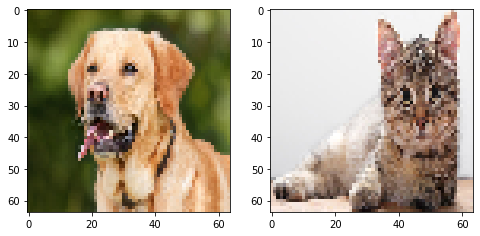

In [6]:
import matplotlib.pyplot as plt

test_image_1 = image.load_img(os.path.join(PATH, 'single_prediction/cat_or_dog_1.jpg'),
                              target_size=(64, 64))

test_image_2 = image.load_img(os.path.join(PATH, 'single_prediction/cat_or_dog_2.jpg'),
                              target_size=(64, 64))

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(test_image_1)
fig.add_subplot(rows, columns, 2)
plt.imshow(test_image_2)
plt.show()

In [7]:
test_image_1 = image.img_to_array(test_image_1)
test_image_2 = image.img_to_array(test_image_2)
# converts 2d (64, 64) image to 3d (64, 64, 3) array (3 channels because image is coloured)

test_image_1 = np.expand_dims(test_image_1, axis=0)
test_image_2 = np.expand_dims(test_image_2, axis=0)
# (64, 64, 3) -> (1, 64, 64, 3)

In [8]:
result_1 = classifier.predict(test_image_1)
result_2 = classifier.predict(test_image_2)

print(result_1)
print(result_2)
print(training_set.class_indices)

[[1.]]
[[4.74371e-12]]
{'cats': 0, 'dogs': 1}


In [9]:
if result_1[0][0] == training_set.class_indices['dogs']:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

if result_2[0][0] == training_set.class_indices['dogs']:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
cat
